# Data Science Salaries 

Competição de Análise Exploratória organizado pelo André Yukio, responsável pela comunidade Universidade dos Dados. A provocação inicial é realizar uma análise exploratória de um dataset contendo informações sobre os salários das principais funções da área de dados. 
<br> 
### Dicionário de Variáveis
O dataset que utilizamos conta com o seguinte dicionário de variáveis:
- job title: o cargo ou função associado ao salário informado.
- experience level: o nível de experiência do indíviduo. 
- employment type: indica o tipo de trabalho associado ao tempo gasto.
- work models: descrição do modelo de trabalho (remoto, presencial ou híbrido).
- work year: ano em que as informações salariais foram registradas.
- employee residence: o local de residência do funcionário.
- salary: o salário informado na moeda original.
- salary currency: identificação da moeda corrente.
- salary in usd: salário convertido em doláres americanos. 
- company location: localização geográfica da organização empregadora. 
- company size: o tamanho da empresa, levando em conta o número de funcionários da empresa. 

O link do dataset pode ser encontrado em: https://www.kaggle.com/datasets/sazidthe1/data-science-salaries?resource=download

## 1. Importando Bibliotecas

In [83]:
import pandas as pd 
import seaborn as sn
import numpy as np 
from matplotlib import pyplot as plt 
import plotly.express as px 

# Mostrar todas as colunas de um dataframe 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## 2. Importando a Base

In [73]:
df = pd.read_csv('data_science_salaries.csv')
df.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


<br>

# 3. Inspeção dos Dados

### 3.1 Verificação do tipo de dado 

Após a obtenção do dataset, é de extrema importância avaliar o modo como cada variável foi categorizada, compreendendo se o tipo de dado foi corretamente identificado. 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


### 3.2 Verificação do número de valores nulos em cada coluna

In [75]:
# Proporção de valores nulos por coluna
df.isna().mean()

job_title             0.0
experience_level      0.0
employment_type       0.0
work_models           0.0
work_year             0.0
employee_residence    0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
company_location      0.0
company_size          0.0
dtype: float64

A base de dados não apresenta valores nulos na composição de cada uma das colunas, não sendo necessário nenhum tratamento nos dados que temos a disposição. 

### 3.3 Contagem de valores distintos na coluna de tipo de moeda

In [76]:
# Valores distintos por variável 
df['salary_currency'].value_counts().shape[0]

22

Como temos uma multiplicidade de países de origem do trabalhador e moedas diferentes, iremos desconsiderar da análise a coluna 'salary', fazendo uso da coluna 'salary_in_usd' visando manter o mesmo padrão nas análises de cunho quantitativo. 

### 3.4 Detecção de Outliers

Faremos uma visualização das variáveis do dataset verificando a ocorrência ou não de uma distribuição normal, visando identificar possíveis outliers presentes nos dados. Dado as características deste dataset, plotaremos um boxplot da variável salary_in_usd.  

<AxesSubplot:ylabel='salary_in_usd'>

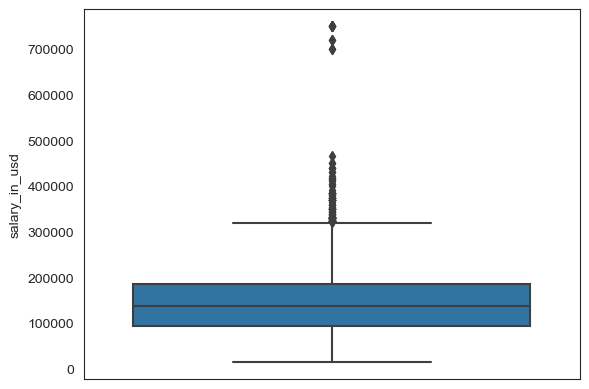

In [77]:
# Plot do Boxplot
sn.boxplot(y='salary_in_usd', data=df)

Verifica-se a existência de outliers. Faremos uso da distância interquartil (IQR) associado aos valores agrupados no 1° Quartil (Valor que separa os 25% menores valores da coluna) e 3° Quartil (Valor que separa os 25% maiores valores da coluna) como método para tratativa dos outliers. 

In [78]:
# Cálculo IQR para variável 'salary_in_usd'
q1_salary = df.salary_in_usd.quantile(.25)
q3_salary = df.salary_in_usd.quantile(.75)
IQR_salary = q3_salary - q1_salary
print(f'Valor 1º Quartil: {q1_salary:.2f} dólares')
print(f'Valor 3º Quartil: {q3_salary:.2f} dólares')
print(f'Valor do IQR: {IQR_salary:.2f} dólares')

# Limite para considerar outlier
salary_top = q3_salary + (1.5 * IQR_salary)
print(f'Valor Limite Superior: {salary_top:.2f} dólares')

Valor 1º Quartil: 95000.00 dólares
Valor 3º Quartil: 185000.00 dólares
Valor do IQR: 90000.00 dólares
Valor Limite Superior: 320000.00 dólares


In [79]:
# Quantidade de valores acima de 320000 para salary
print(f'{len(df[df.salary_in_usd > 320000])} entradas')
print(f'{(len(df[df.salary_in_usd > 320000]) / df.shape[0])*100:.2f} %')

107 entradas
1.62 %


Por meio da IQR, chegamos que o limite superior é de um salário de 320k dólares. Quando buscamos a representatividade deste público temos um share de apenas 1,62% de todas as informações disponíveis no dataset. Desse modo, seguiremos com a exclusão destes casos da base. 

Text(0.5, 1.0, 'BoxPlot da Variável Salário Pós Retirada dos Outliers')

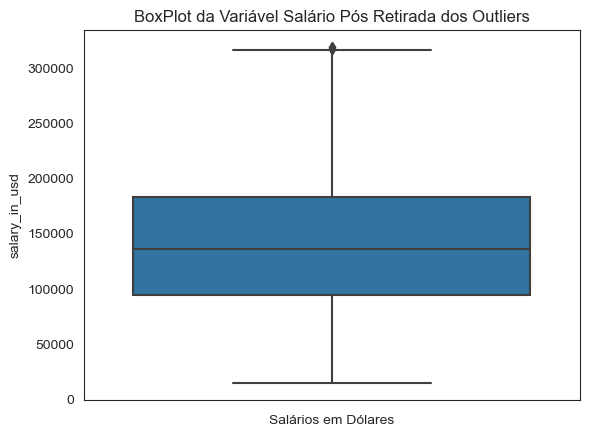

In [80]:
# Remoção dos outliers da variável 'salary_in_usd'
df.drop(df[df.salary_in_usd > 320000].index, axis=0, inplace=True)

# Plot do Boxplot Pós Retirada dos Outliers 
sn.boxplot(y='salary_in_usd', data=df)
plt.xlabel('Salários em Dólares')
plt.title('BoxPlot da Variável Salário Pós Retirada dos Outliers')


<br>

## 4. Análise Exploratória 

### 4.1 Qual é a distribuição salarial por cargo no dataset? 

In [12]:
distinct_jobs = df['job_title'].nunique()
print(f'Variedade de cargos no dataset: ',count_distinct_jobs)

Variedade de cargos no dataset:  132


Tendo em vista que o dataset apresenta um número muito grande de funções disponíveis - totalizando 132 opções -, filtrarei os 4 cargos mais presentes dentro do dataset. 

In [26]:
# Verificação dos cargos mais representativos
count_jobs = df['job_title'].value_counts()
count_jobs_big = count_jobs[count_jobs > 250]
print(count_jobs_big)


Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Name: job_title, dtype: int64


In [27]:
# Puxar um dataset apenas com as informações dos cargos mais representativos na amostra
df_cargos = df.copy()
df_cargos = df_cargos[df_cargos['job_title'].isin(['Data Engineer', 'Data Scientist','Data Analyst', 'Machine Learning Engineer'])]

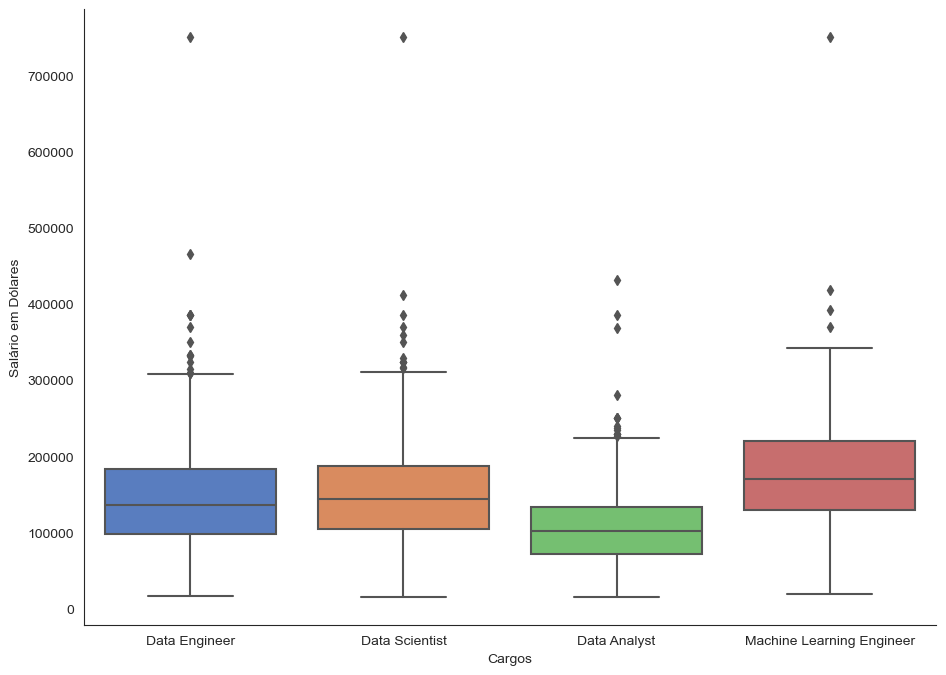

In [28]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sn.boxplot(x='job_title', y='salary_in_usd',data=df_cargos, showfliers=True, palette='muted')
plt.xlabel('Cargos')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [29]:
# Cálculo da média e mediana dos 4 principais cargos
media_cargo = df_cargos.groupby('job_title')['salary_in_usd'].mean()
mediana_cargo = df_cargos.groupby('job_title')['salary_in_usd'].median()

# Criar dataframe para visualização 
df_resultados = pd.DataFrame({'Média': media_cargo, 'Mediana': mediana_cargo})
print(df_resultados)

                                   Média   Mediana
job_title                                         
Data Analyst               106931.689011  102000.0
Data Engineer              144539.700077  136000.0
Data Scientist             149036.650845  144500.0
Machine Learning Engineer  177226.448331  170730.0


O Data Analyst apresenta uma média salarial de 106k, figurando como o cargo com menor média salarial. O cargos de Data Scientist e Data Engineer apresentam médias salariais semelhantes, de 149k e 144k, respectivamente. Figurando na ponta, temos o Machine Learning Engineer, com média salarial de 177k. 
Em um primeiro momento, busca-se explicar essa diferenciação salarial entre os cargos por conta dos limitantes técnicos que cada um dos cargos apresenta. 

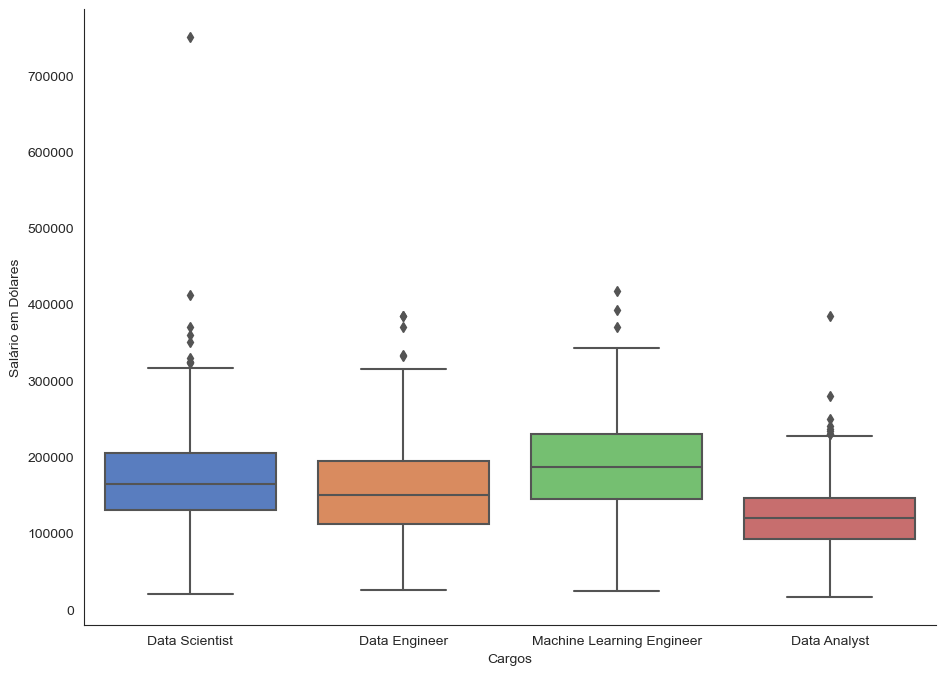

In [31]:
# Focalizando a análise apenas nas informações de sênior
df_cargos = df_cargos[df_cargos['experience_level'].isin(['Senior-level'])]

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sn.boxplot(x='job_title', y='salary_in_usd',data=df_cargos, showfliers=True, palette='muted')
plt.xlabel('Cargos')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Quando delimitamos a análise para comparação salarial entre os funcionários de cargo seniôres, assistimos a mesma tendência observada nos gráficos acima. 

### 4.2 Como tem evoluído o salário médio ao longo dos anos? 

In [34]:
# Compreender o volume de informações para cada ano 
count_anos = df['work_year'].value_counts()
print(count_anos)

2023-01-01    4550
2022-01-01    1104
2024-01-01     552
2021-01-01     214
2020-01-01      72
Name: work_year, dtype: int64


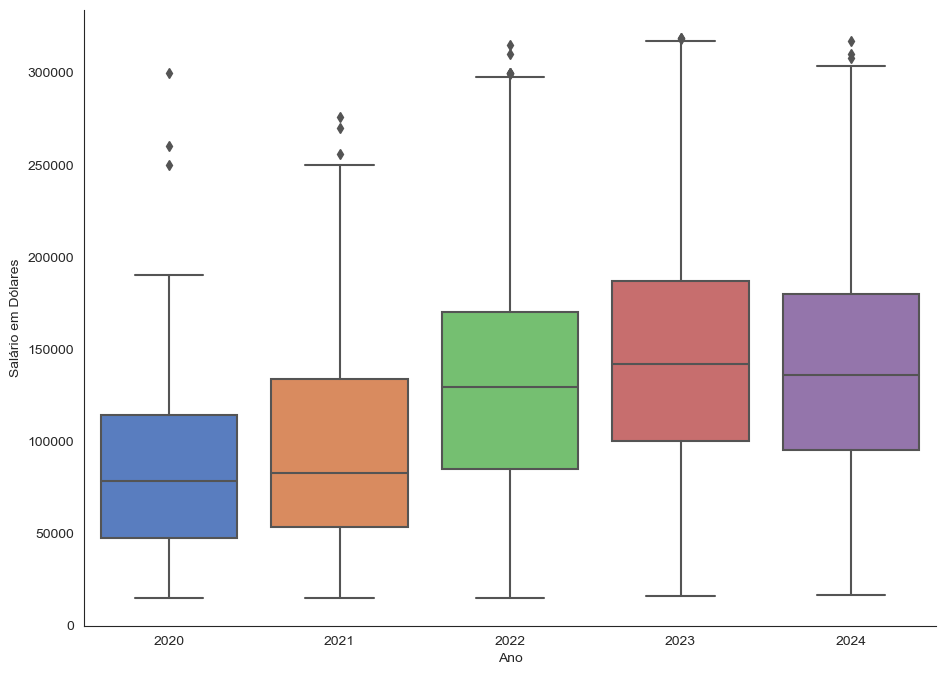

In [44]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sn.boxplot(x='work_year', y='salary_in_usd',data=df, showfliers=True, palette='muted')
plt.xlabel('Ano')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [47]:
df['salary_in_usd'].describe()

count      6492.000000
mean     141468.792976
std       62367.359494
min       15000.000000
25%       94169.000000
50%      136502.500000
75%      183050.000000
max      319000.000000
Name: salary_in_usd, dtype: float64

O dataset apresenta grande parte das informações oriundas dos anos de 2022 e 2023, representando com bastante qualidade o boom na área de tecnologia nos anos citados. 

### 4.3 Existe uma correlação entre o tamanho da empresa e o salário oferecido? 

O dataset apresenta um desbalanceamento na variável do tamanho da companhia, com grande concentração nas empresas de médio porte. 

Text(0.5, 1.0, 'Relação entre Salário e Tamanho da Empresa')

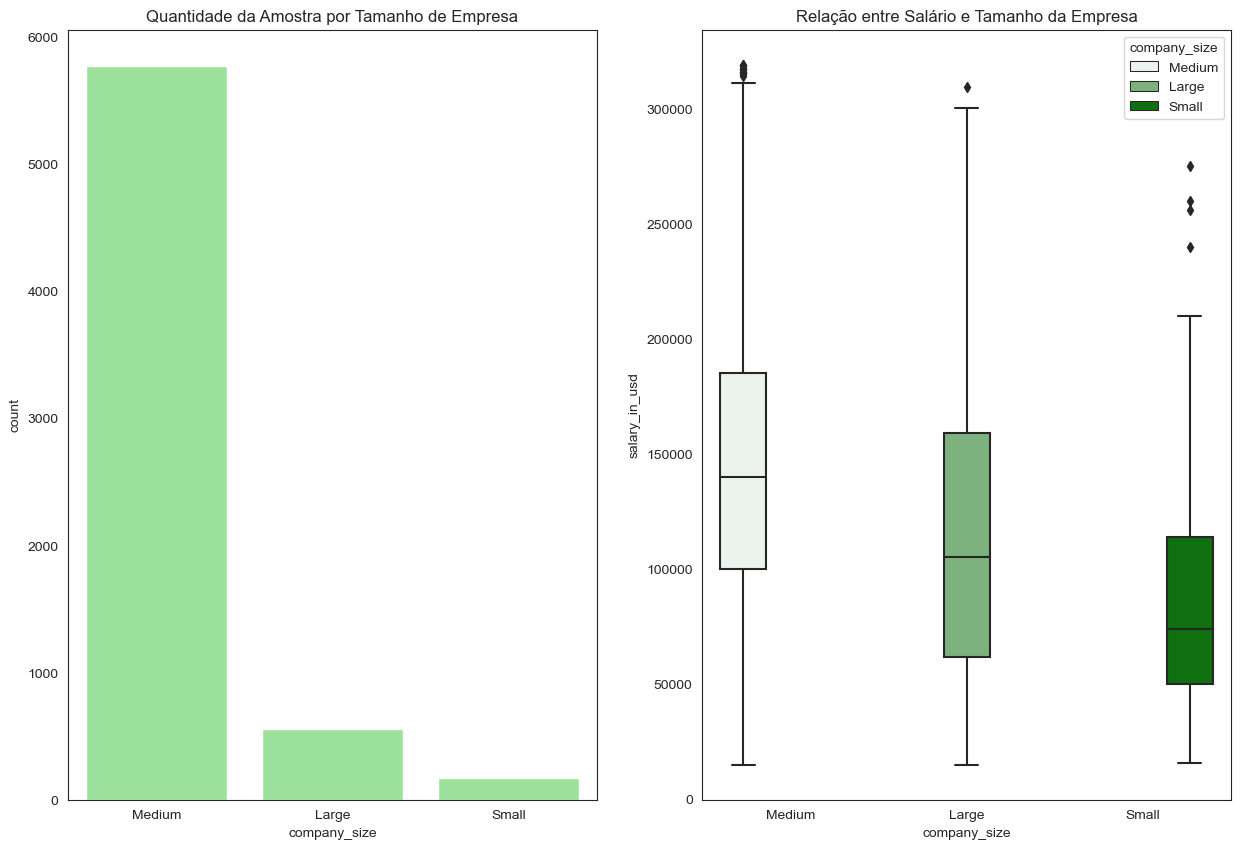

In [55]:
# Subplot de 2 gráficos 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Gráfico 1
sn.countplot(x='company_size', data=df, ax=axes[0],color='lightgreen')
axes[0].set_title('Quantidade da Amostra por Tamanho de Empresa')

#Gráfico 2 
sn.boxplot(x='company_size', y='salary_in_usd', data=df, ax=axes[1], hue='company_size', color='green')
axes[1].set_title('Relação entre Salário e Tamanho da Empresa')

O dataset apresenta um salário médio nas empresas de médio porte superior ao de empresas de grande porte. Partindo da hipótese de que as empresas de médio porte podem ser de startups ou empresas de setores competitivos, podem vir a apresentar melhores salários como forma de atrair melhores profissionais. 

### 4.4 Variação do salário pelo nível de experiência? 

Evidencia-se um desbalanceamento dos dados, com as informações obtidas por funcionários de nível sênior representando +50% dos dados.

Text(0.5, 1.0, 'Relação entre Salário e Nível de Experiência')

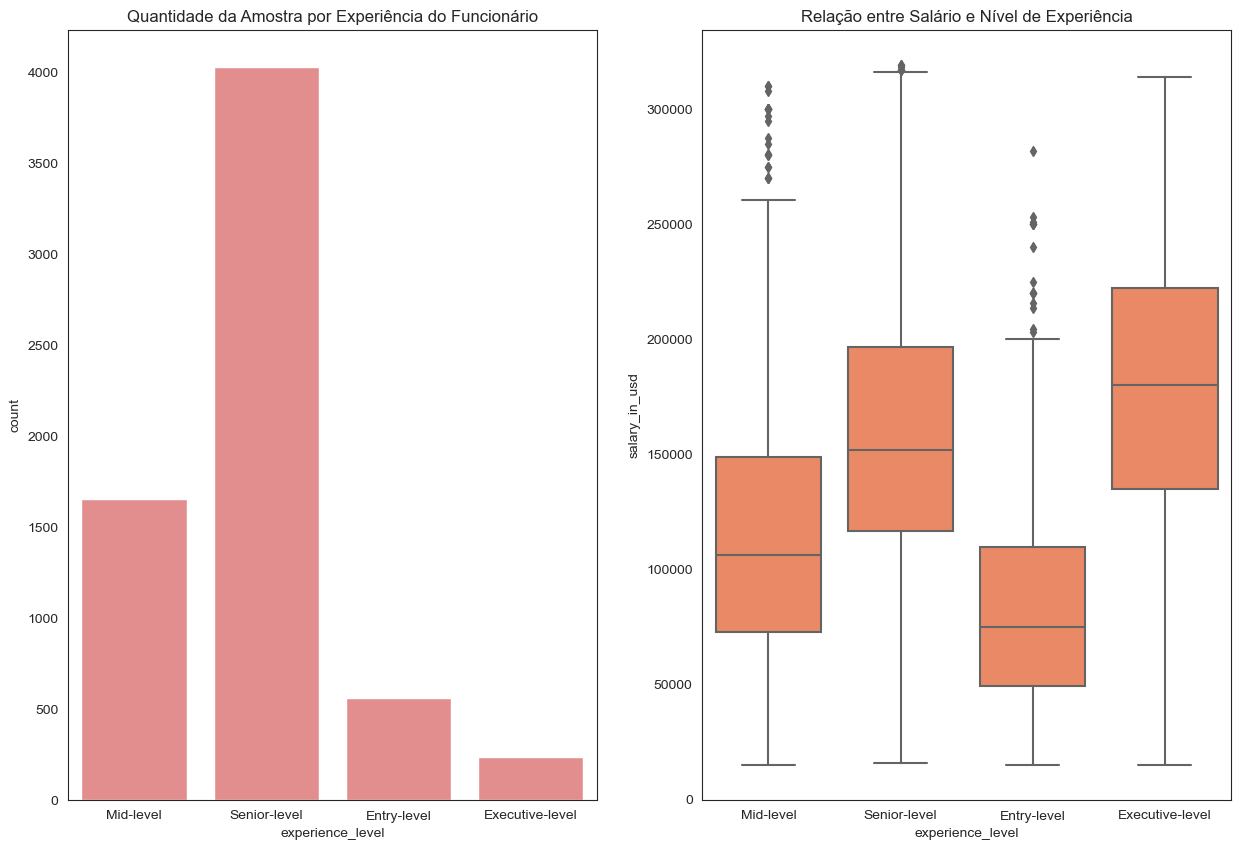

In [88]:
# Subplot de 2 gráficos 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Gráfico 1
sn.countplot(x='experience_level', data=df, ax=axes[0],color='lightcoral')
axes[0].set_title('Quantidade da Amostra por Experiência do Funcionário')

#Gráfico 2 
sn.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=axes[1], color='coral')
axes[1].set_title('Relação entre Salário e Nível de Experiência')

Obtêm-se que enquanto um profissional de entrada apresenta um salário médio na casa dos 70k dólares, um profissional de nível sênior apresenta uma média salarial de 150k, podendo ultrapassar a casa dos 300k. Interessante notar a presença de alguns salários outliers quando agrupados por nível de experiência, como a apresença de estagiários ganhando acima de 200k. 

In [70]:
# Substituição do nível do funcionário por números, visando ordenar
df_level = df.copy()
df_level['experience_level'] = df_level['experience_level'].replace('Entry-level', 1)
df_level['experience_level'] = df_level['experience_level'].replace('Mid-level', 2)
df_level['experience_level'] = df_level['experience_level'].replace('Senior-level', 3)
df_level['experience_level'] = df_level['experience_level'].replace('Executive-level', 4)

df_level

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,2,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,2,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,3,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,3,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,2,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,1,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,4,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,3,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,2,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


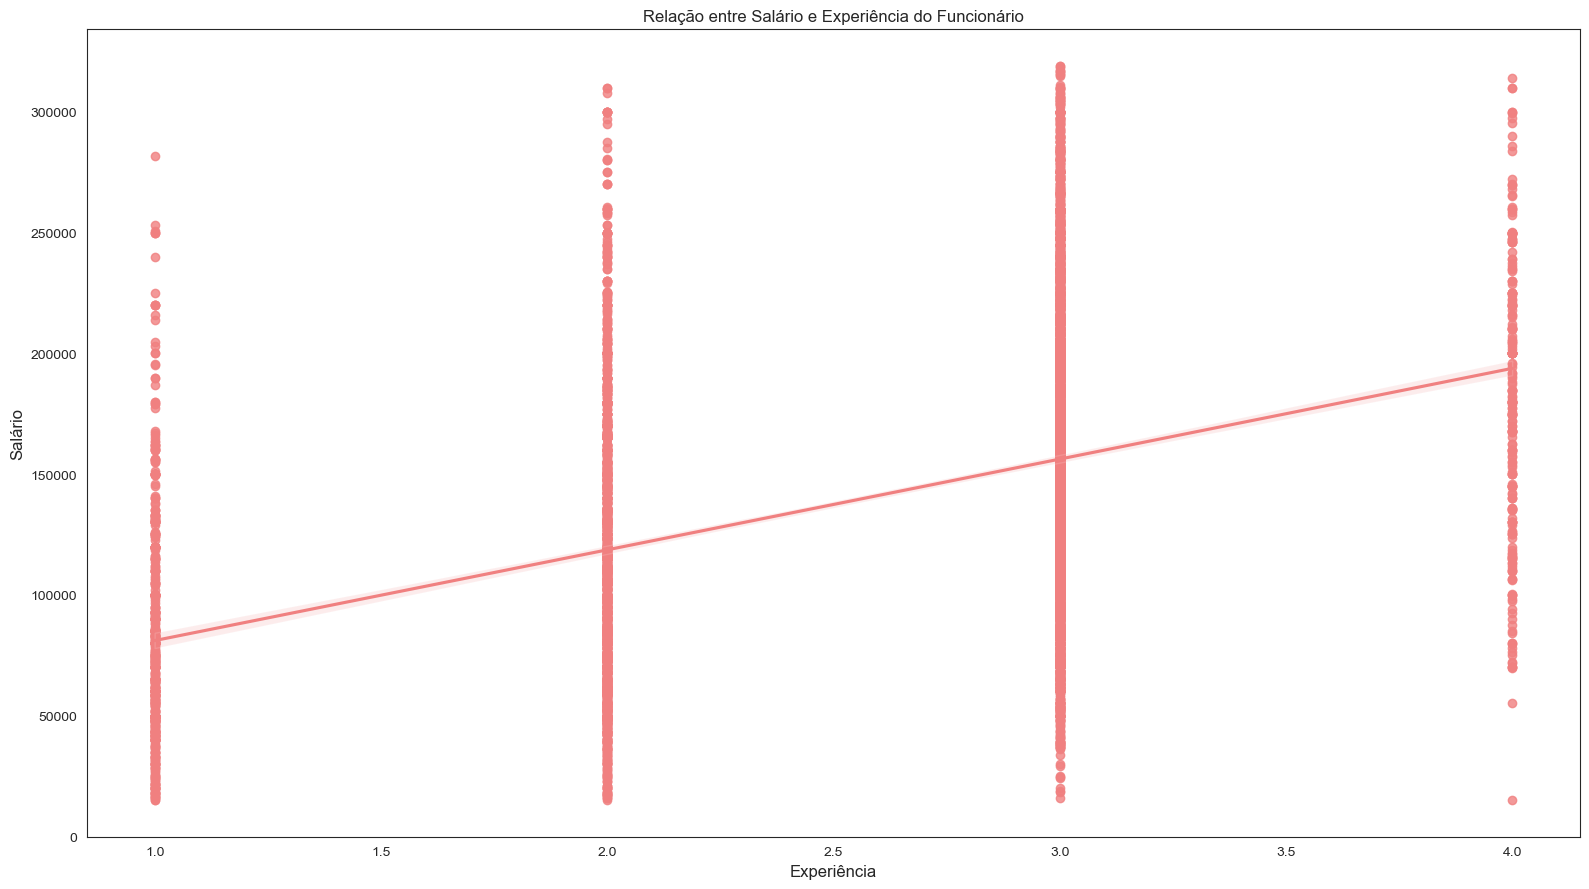

In [74]:
plt.figure(figsize=(16, 9)) 

sn.regplot(x='experience_level', y='salary_in_usd', data=df_level, color='lightcoral')
plt.title('Relação entre Salário e Experiência do Funcionário')
plt.xlabel('Experiência', fontsize=12)
plt.ylabel('Salário', fontsize=12)

plt.tight_layout()
plt.show()

A função regplot retorna um gráfico de dispersão contemplando todos os salários, criando um a linha de regressão linear; que neste caso, aponta uma tendência positiva de uma correlação entre as variáveis. Ou seja, quanto maior o nível do cargo ocupado, maior o salário esperado para aquela posição. 

### 4.5 Impacto do modelo de trabalho nos salários 

Text(0.5, 1.0, 'Quantidade da Amostra por Modelo de Trabalho')

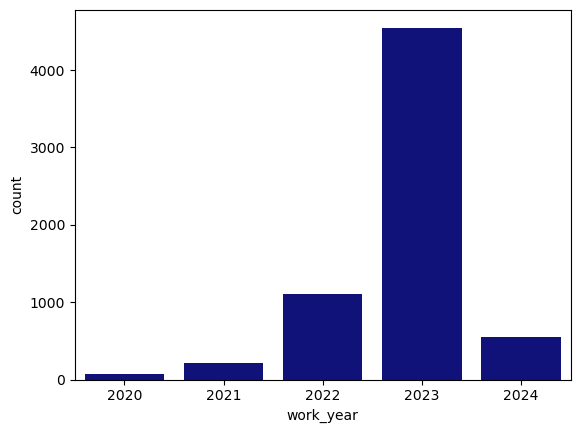

In [16]:
# Gráfico 1
sn.countplot(x='work_year', data=df,color='darkblue')
axes[0].set_title('Quantidade da Amostra por Modelo de Trabalho')

Grande parte da amostra advém de informações oriundas do ano de 2023, um contexto marcado pela pós pandemia, e consequentemente, o retorno de muitas empresas para o presencial.

Text(0.5, 1.0, 'Relação entre Salário e Modelo de Trabalho')

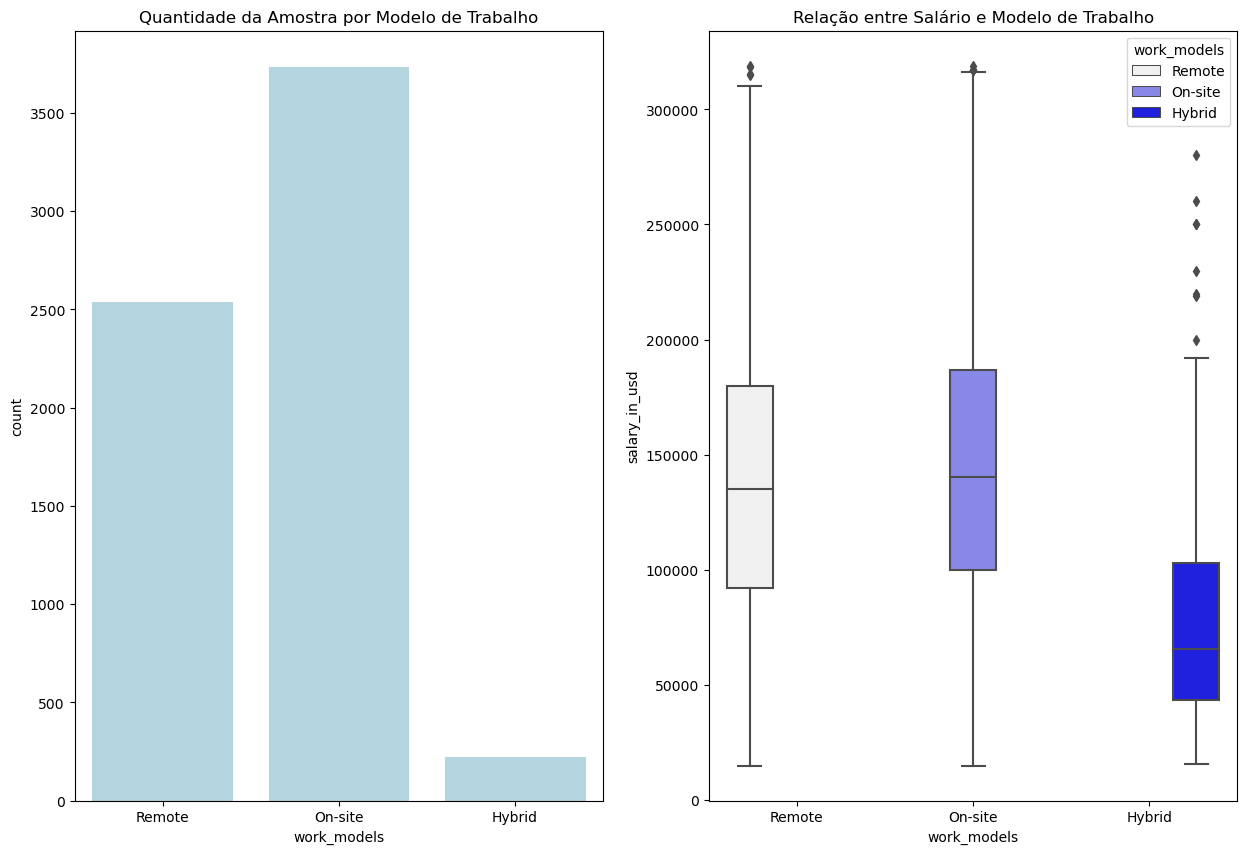

In [13]:
# Subplot de 2 gráficos 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Gráfico 1
sn.countplot(x='work_models', data=df, ax=axes[0],color='lightblue')
axes[0].set_title('Quantidade da Amostra por Modelo de Trabalho')

#Gráfico 2 
sn.boxplot(x='work_models', y='salary_in_usd', data=df, ax=axes[1], hue='work_models', color='blue')
axes[1].set_title('Relação entre Salário e Modelo de Trabalho')

Saliado o contexto de obtenção desses dados, observa-se uma maior quantidade de amostras para um modelo de trabalho presencial, ao passo que o híbrido apresenta um volume muito pequeno. 

Text(0.5, 1.0, 'Relação de salários por modelo em 2024')

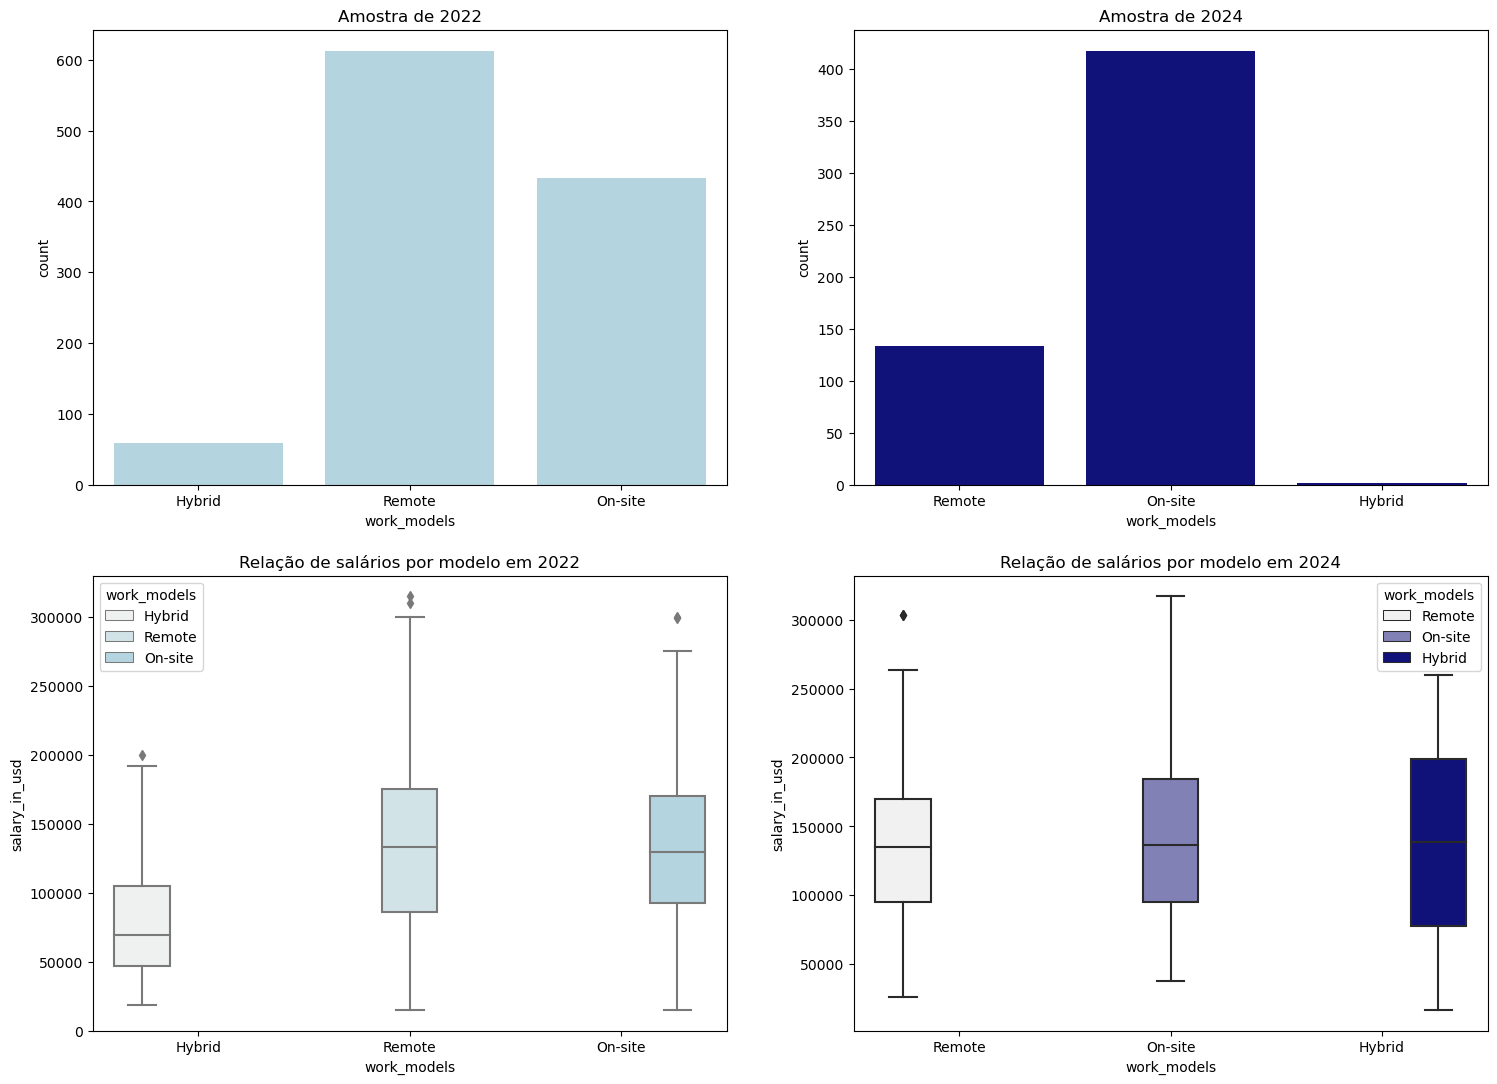

In [27]:
df_2022 = df[df['work_year'] == 2022]
df_2024 = df[df['work_year'] == 2024]


# Subplot de 2 gráficos 
fig, axes = plt.subplots(2, 2, figsize=(18, 13))

# Gráfico 1
sn.countplot(x='work_models', data=df_2022, ax=axes[0,0],color='lightblue')
axes[0,0].set_title('Amostra de 2022')

#Gráfico 2 
sn.countplot(x='work_models', data=df_2024, ax=axes[0,1], color='darkblue')
axes[0,1].set_title('Amostra de 2024')

# Gráfico 3
sn.boxplot(x='work_models', y='salary_in_usd', data=df_2022, ax=axes[1,0], hue='work_models', color='lightblue')
axes[1,0].set_title('Relação de salários por modelo em 2022')

# Gráfico 4
sn.boxplot(x='work_models', y='salary_in_usd', data=df_2024, ax=axes[1,1], hue='work_models', color='darkblue')
axes[1,1].set_title('Relação de salários por modelo em 2024')

Por fim, comparando-se a volumetria do ano de 2022 vs 2024, observa-se uma deteriorização do volume de vagas híbridas e remotas, ao passo de um crescimento do volume de vagas presenciais. Apesar da diminuição do número de vagas no modelo remoto, os salários não apresentaram grandes variações. 

### 4.6 Relação da localização da sede da empresa com os salários

In [41]:
distinct_countries = df['company_location'].nunique()
print(f'Variedade de países no dataset: ',distinct_countries)

Variedade de países no dataset:  75


In [49]:
# Verificação dos cargos mais representativos
count_countries = df['company_location'].value_counts()
count_countries_big = count_countries[count_countries > 50]
print(count_countries_big)


United States     5254
United Kingdom     402
Canada             243
Germany             78
Spain               63
India               58
Name: company_location, dtype: int64


Dado a variabilidade presente na coluna de países, e de modo a comparar os países pela moeda americana, focaremos nossa análise nos 5 países com maiores amostras no dataset, retirando os Estados Unidos. 

In [50]:
# Puxar um dataset apenas com as informações dos cargos mais representativos na amostra
df_countries = df.copy()
df_countries = df_countries[df_countries['company_location'].isin(['United Kingdom', 'Canada','Germany', 'Spain'])]

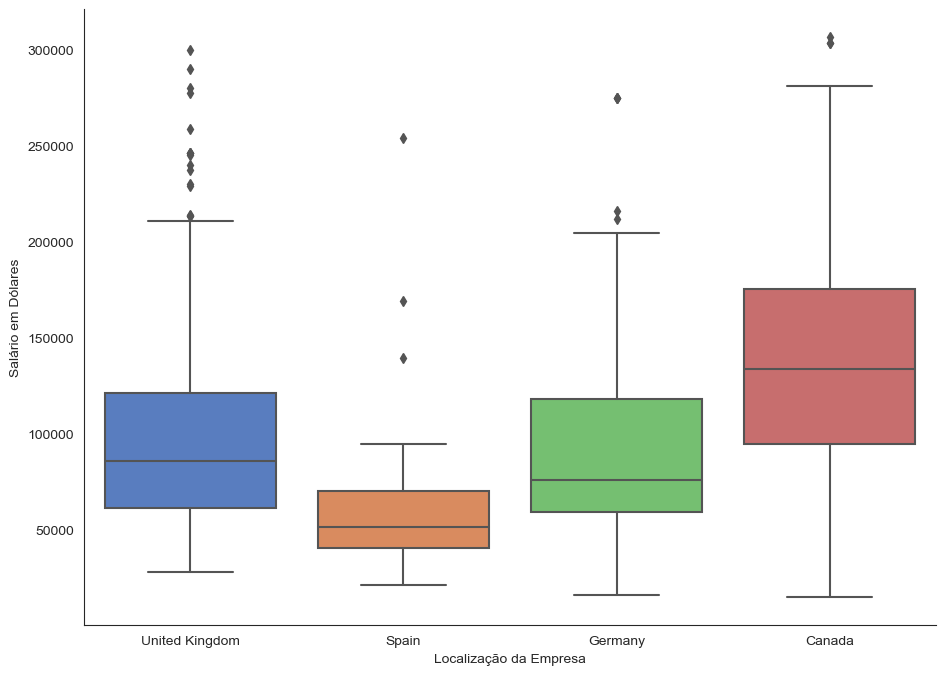

In [52]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sn.set_style("white")

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sn.boxplot(x='company_location', y='salary_in_usd',data=df_countries, showfliers=True, palette='muted')
plt.xlabel('Localização da Empresa')
plt.ylabel('Salário em Dólares')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

De modo geral, levando-se em conta o fato de que estamos realizando a análise em dólares americanos, verifica-se que enquanto o Canada apresenta salários médios semelhante ao dos Estados Unidos, outros países como Espanha e Alemanha ficam bem abaixo. 

<br>

## 5. Conclusões

Há pouco mais de 10 anos atrás foi publicado um artigo que conceituava o cientista de dados como a profissão mais sexy do mundo. Uma década depois observamos o crescimento cada vez maior da área, repleto de novos desdobramentos e desenvolvimentos constantes. A presente análise buscou analisar um dataset com vistas a trazer visões e interpretações acerca do atual contexto da área, que podem ser resumidos: 
- Dentre os principais cargos da amostra (Data Engineer, Data Analyst, Data Scientist, Machine Learning Engineer) temos os profissionais de ML Engineer com as maiores médias salariais, superando a média de 175k doláres; 


- Grande parte da amostra advém de informações dos anos de 2022 e 2023, representando um crescimento das médias salariais, muito em linha com o contexto pós pandemia; 


- Empresas de médio porte apresentam médias salariais mais altas; 


- Existe uma correlação positiva entre a senioridade do profissional e o salário recebido;


- Contexto pós pandêmico apresenta uma tendência de redução do número de vagas híbridas e remotas, além de estabilidade de salário para estas modalidades; 
